**IMPORTING RELEVANT LIBRARIES**

In [167]:
# Importing necessary libraries
import pandas as pd
import csv
from google.colab import files
import re
import nltk
nltk.download('stopwords')
nltk.download('all')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_e

In [168]:
# Uploading all .json files
uploaded = files.upload()

Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107 (1).json
Saving ver1_scrapedweb-1023.json to ver1_scrapedweb-1023 (1).json
Saving ver1_scrapedweb-1024.json to ver1_scrapedweb-1024 (1).json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025 (1).json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026 (1).json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027 (1).json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030 (1).json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031 (1).json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032 (1).json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033 (1).json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034 (1).json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035 (1).json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036 (1).json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037 (1).json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063 (1).json
Saving ver1_

In [169]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
# gensim changed to gensim_models
import pyLDAvis.gensim_models  # Important
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [170]:
# list of the names of the json files
file_names = ['ver1_scrapedweb-107.json', 'ver1_scrapedweb-1023.json','ver1_scrapedweb-1024.json','ver1_scrapedweb-1025.json','ver1_scrapedweb-1026.json','ver1_scrapedweb-1027.json','ver1_scrapedweb-1030.json','ver1_scrapedweb-1031.json','ver1_scrapedweb-1032.json','ver1_scrapedweb-1033.json','ver1_scrapedweb-1034.json','ver1_scrapedweb-1035.json','ver1_scrapedweb-1036.json','ver1_scrapedweb-1037.json','ver1_scrapedweb-1063.json','ver1_scrapedweb-1068.json','ver1_scrapedweb-1070.json']

In [171]:
# Obtaining the raw data
raw_data=[]
for i in file_names:
  raw_data.append(uploaded[i].decode("utf-8"))
raw_data

['{"text": ["Easy Halloween Painting | Adorable Witch Sisters In The Woods | #Lovefallart #Painting | The Art Sherpa", "canvas painting for beginners videos", " ", " ", " BEGINNER HOW TO PAINT art lesson \\" Adorable Witch Sisters in the woods \\" with a black cat in acrylic art tutorial. Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson . Full painting : ", "http://bit.ly/1RxdK2F", " traceable ", "http://bit.ly/22sgTCT", " The Creative Art Collaborations Presents Love a love of autumn and fall video art festival. Just use the hashtag to get your ticket for a sea of amazing creativity. Tons of artists have created art and craft videos for your fall viewing enjoyment ", "#lovefallart", " ", "#painting", " ", "#creativeartscollaboration", " Great for a private at HOME PAINTING PARTY with friends and family. This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours. This is a lot of fun and all

In [173]:
# Combining both lists; File_Name and Raw Text to form a dataframe
df_data = pd.DataFrame(list( raw_data), columns=[ 'Text'])
print(df_data)

                                                 Text
0   {"text": ["Easy Halloween Painting | Adorable ...
1   {"text": ["Unedited Photos That Show Just How ...
2   {"text": ["Watch | ABC6", "Watch ABC6 online",...
3   {"text": ["Art | Thiel College", "Thiel Colleg...
4   {"text": [" Watch Shrek Forever After (2010) -...
5   {"text": ["Manual de can\u00e7\u00f5es de 28 A...
6   {"text": ["FORCE OF FEELING Chapter 1 - Manhua...
7   {"text": ["\r\n\tIdhi Nadhi Movie Pooja Ceremo...
8   {"text": ["DOWNLOAD DeJ Loaf - Tap In (feat. 4...
9   {"text": ["Friday Funday | Visit Sarasota", "I...
10  {"text": ["Noticias de subnacionales | Unitel"...
11  {"text": ["Delivery Knight Chapter 47 - Manhua...
12  {"text": ["Samantha Bernardo slays her #GRANDn...
13  {"text": ["In Memoriam: Joanne Germaine Vincen...
14  {"text": ["Planets in the Park - 3 Day Virtual...
15  {"text": ["Broken Melody Chapter 60 - ManhuaSc...
16  {"text": ["\u300a\u4f60\u662f\u6211\u7684\u57c...


# **DATA CLEANSING**

In [174]:
# Removing all '\n', '\r', '\t' elements
# Using strip() and replace() to remove whitespaces

for i in range(17):
  # Removing any URLs present in the dataframe
  df_data['Text'].values[i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', df_data['Text'].values[i], flags=re.MULTILINE)
  # Removing all '\'
  df_data['Text'].values[i] = re.sub(r"\W", " ", df_data['Text'].values[i])
  # Removing ' n ' left after removing '\'
  df_data['Text'].values[i] = re.sub(r" n ", " ", df_data['Text'].values[i])
  # Removing ' r ' left after removing '\'
  df_data['Text'].values[i] = re.sub(r" r ", " ", df_data['Text'].values[i])
  df_data['Text'].values[i] = " ".join(df_data['Text'].values[i].split())
  # Removing first element 'text'
  df_data['Text'].values[i] = df_data['Text'].values[i].split(' ', 1)[1]
  # Removing ' r ' left after removing '\'
  # Using loops to ensure that all 't' elements are removed
  for j in range(5):
    df_data['Text'].values[j] = re.sub(r" t ", " ", df_data['Text'].values[j])
  

df_data=df_data.replace('\*','',regex=True)
df_data["Text"][15]

'Broken Melody Chapter 60 ManhuaScan Read Broken Melody Chapter 60 Online Broken Melody Chapter 60 u00a9 2018 ManhuaScan Com'

**REMOVING NUMBERS**

In [175]:
for i in range(17):
  # 'inplace =True' is used to change the source dataframe
  df_data["Text"].replace('\d+', '', regex=True, inplace = True)


## **TOKENIZING**

In [176]:
# Function to perform Tokenizing 
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split

In [177]:
# Tokenizing after changing all elements to lower-case 
df_data['Text']=df_data['Text'].apply(lambda x: tokenizing(x.lower()))

In [178]:
# Observing one element of the dataframe
df_data["Text"][0]

['easy',
 'halloween',
 'painting',
 'adorable',
 'witch',
 'sisters',
 'in',
 'the',
 'woods',
 'lovefallart',
 'painting',
 'the',
 'art',
 'sherpa',
 'canvas',
 'painting',
 'for',
 'beginners',
 'videos',
 'beginner',
 'how',
 'to',
 'paint',
 'art',
 'lesson',
 'adorable',
 'witch',
 'sisters',
 'in',
 'the',
 'woods',
 'with',
 'a',
 'black',
 'cat',
 'in',
 'acrylic',
 'art',
 'tutorial',
 'create',
 'this',
 'easy',
 'halloween',
 'painting',
 'in',
 'acrylic',
 'from',
 'this',
 'fun',
 'and',
 'easy',
 'art',
 'lesson',
 'full',
 'painting',
 'http',
 'bit',
 'ly',
 'rxdkf',
 'traceable',
 'http',
 'bit',
 'ly',
 'sgtct',
 'the',
 'creative',
 'art',
 'collaborations',
 'presents',
 'love',
 'a',
 'love',
 'of',
 'autumn',
 'and',
 'fall',
 'video',
 'art',
 'festival',
 'just',
 'use',
 'the',
 'hashtag',
 'to',
 'get',
 'your',
 'ticket',
 'for',
 'a',
 'sea',
 'of',
 'amazing',
 'creativity',
 'tons',
 'of',
 'artists',
 'have',
 'created',
 'art',
 'and',
 'craft',
 'vide

### **REMOVING EXTRA SPACES**

In [179]:
for i in range(17):
  temp= []
  for j in df_data["Text"].values[i]:
    if j.strip():
      temp.append(j)
  df_data["Text"].values[i] = temp
print(df_data)

                                                 Text
0   [easy, halloween, painting, adorable, witch, s...
1   [unedited, photos, that, show, just, how, craz...
2   [watch, abc, watch, abc, online, main, navigat...
3   [art, thiel, college, thiel, college, fine, ar...
4   [watch, shrek, forever, after, streaming, t, r...
5   [manual, de, can, ue, ufes, de, abr, rtp, play...
6   [force, of, feeling, chapter, manhuascan, read...
7   [tidhi, nadhi, movie, pooja, ceremony, image, ...
8   [download, dej, loaf, tap, in, feat, dugg, sad...
9   [friday, funday, visit, sarasota, it, us, frid...
10  [noticias, de, subnacionales, unitel, noticias...
11  [delivery, knight, chapter, manhuascan, read, ...
12  [samantha, bernardo, slays, her, grandnadawalk...
13  [in, memoriam, joanne, germaine, vincent, carp...
14  [planets, in, the, park, day, virtual, event, ...
15  [broken, melody, chapter, manhuascan, read, br...
16  [ua, uf, uf, u, u, uce, uc, u, u, ub, ubc, uc,...


### **REMOVING STOPWORDS**

In [180]:
# Removing Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |={"ua", "uf", "u", "uce", "uc", "ub", "ubc", "ucb", "uaTV", "cdq", "ud", "uve", "ure", "uaTV", "uatv", "http"}
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopwords and word not in STOP_WORDS]
    return text

In [181]:
# Calling the function to remove Stopwords
df_data['Text'] = df_data['Text'].apply(lambda x: remove_stopwords(x))
# Observing one element of the dataframe
df_data["Text"][0]

['easy',
 'halloween',
 'painting',
 'adorable',
 'witch',
 'sisters',
 'woods',
 'lovefallart',
 'painting',
 'art',
 'sherpa',
 'canvas',
 'painting',
 'beginners',
 'videos',
 'beginner',
 'paint',
 'art',
 'lesson',
 'adorable',
 'witch',
 'sisters',
 'woods',
 'black',
 'cat',
 'acrylic',
 'art',
 'tutorial',
 'create',
 'easy',
 'halloween',
 'painting',
 'acrylic',
 'fun',
 'easy',
 'art',
 'lesson',
 'painting',
 'bit',
 'ly',
 'rxdkf',
 'traceable',
 'bit',
 'ly',
 'sgtct',
 'creative',
 'art',
 'collaborations',
 'presents',
 'love',
 'love',
 'autumn',
 'fall',
 'video',
 'art',
 'festival',
 'use',
 'hashtag',
 'ticket',
 'sea',
 'amazing',
 'creativity',
 'tons',
 'artists',
 'created',
 'art',
 'craft',
 'videos',
 'fall',
 'viewing',
 'enjoyment',
 'lovefallart',
 'painting',
 'creativeartscollaboration',
 'great',
 'private',
 'home',
 'painting',
 'party',
 'friends',
 'family',
 'fully',
 'guided',
 'step',
 'step',
 'acrylic',
 'painting',
 'lesson',
 'hanging',
 'ar

**STEMMING AND LEMMATIZATION**

In [182]:
from nltk.stem import WordNetLemmatizer  
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [183]:
# STEMMING
"""Lancaster=LancasterStemmer()
for i in range(17):
  temp = []
  temp1 = df_data['Text'].values[i]
  for j in temp1:
    temp.append(Lancaster.stem(j))
  df_data['Text'].values[i] = temp"""

# LEMMATIZATION 
lemmatizer = WordNetLemmatizer()
for i in range(17):
  temp = []
  temp1 = df_data['Text'].values[i]
  for j in temp1:
    temp.append(lemmatizer.lemmatize(j))
    
   
  df_data['Text'].values[i] = temp

In [184]:
print(df_data)

                                                 Text
0   [easy, halloween, painting, adorable, witch, s...
1   [unedited, photo, crazy, past, history, daily,...
2   [watch, abc, watch, abc, online, main, navigat...
3   [art, thiel, college, thiel, college, fine, ar...
4   [watch, shrek, forever, streaming, rumpelstilt...
5   [manual, de, ue, ufes, de, abr, rtp, play, rtp...
6   [force, feeling, chapter, manhuascan, read, fo...
7   [tidhi, nadhi, movie, pooja, ceremony, image, ...
8   [download, dej, loaf, tap, feat, dugg, sada, b...
9   [friday, funday, visit, sarasota, friday, work...
10  [noticias, de, subnacionales, unitel, noticias...
11  [delivery, knight, chapter, manhuascan, read, ...
12  [samantha, bernardo, slays, grandnadawalk, mis...
13  [memoriam, joanne, germaine, vincent, carpenti...
14  [planet, park, day, virtual, event, san, anton...
15  [broken, melody, chapter, manhuascan, read, br...
16                                                 []


In [185]:
# Converting the datarame into a list 
data = df_data.Text.values.tolist()
list_clean = []
# Removing all words which have less than 4 letters 
for i in data:
  clean = []
  for x in i:
    if len(x)>=3:
      clean.append(x)
  list_clean.append(clean)
data = list_clean

data

[['easy',
  'halloween',
  'painting',
  'adorable',
  'witch',
  'sister',
  'wood',
  'lovefallart',
  'painting',
  'art',
  'sherpa',
  'canvas',
  'painting',
  'beginner',
  'video',
  'beginner',
  'paint',
  'art',
  'lesson',
  'adorable',
  'witch',
  'sister',
  'wood',
  'black',
  'cat',
  'acrylic',
  'art',
  'tutorial',
  'create',
  'easy',
  'halloween',
  'painting',
  'acrylic',
  'fun',
  'easy',
  'art',
  'lesson',
  'painting',
  'bit',
  'rxdkf',
  'traceable',
  'bit',
  'sgtct',
  'creative',
  'art',
  'collaboration',
  'present',
  'love',
  'love',
  'autumn',
  'fall',
  'video',
  'art',
  'festival',
  'use',
  'hashtag',
  'ticket',
  'sea',
  'amazing',
  'creativity',
  'ton',
  'artist',
  'created',
  'art',
  'craft',
  'video',
  'fall',
  'viewing',
  'enjoyment',
  'lovefallart',
  'painting',
  'creativeartscollaboration',
  'great',
  'private',
  'home',
  'painting',
  'party',
  'friend',
  'family',
  'fully',
  'guided',
  'step',
  'st

# **EMBEDDINGS**

># **BAG OF WORDS**



In [186]:
# Creating a Dictionary as input to the LDA model 
dictionary = corpora.Dictionary(data)

# Creating corpus
corp = data

corpus = [dictionary.doc2bow(text) for text in corp]
print(corpus)


[[(0, 1), (1, 17), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 30), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 8), (17, 1), (18, 2), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 3), (40, 6), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 4), (63, 1), (64, 1), (65, 2), (66, 2), (67, 1), (68, 2), (69, 1), (70, 1), (71, 3), (72, 1), (73, 2), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 2), (84, 1), (85, 5), (86, 1), (87, 1), (88, 8), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 3), (100, 2), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 

# **TF-IDF EMBEDDING**

In [187]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.017074902265942587),
 (1, 0.3842901262351301),
 (2, 0.022605301543242945),
 (3, 0.022605301543242945),
 (4, 0.04521060308648589),
 (5, 0.022605301543242945),
 (6, 0.022605301543242945),
 (7, 0.34633508965926685),
 (8, 0.041519478224119485),
 (9, 0.022605301543242945),
 (10, 0.022605301543242945),
 (11, 0.022605301543242945),
 (12, 0.022605301543242945),
 (13, 0.022605301543242945),
 (14, 0.022605301543242945),
 (15, 0.017074902265942587),
 (16, 0.18084241234594356),
 (17, 0.022605301543242945),
 (18, 0.04521060308648589),
 (19, 0.017074902265942587),
 (20, 0.04521060308648589),
 (21, 0.04521060308648589),
 (22, 0.022605301543242945),
 (23, 0.022605301543242945),
 (24, 0.017074902265942587),
 (25, 0.022605301543242945),
 (26, 0.022605301543242945),
 (27, 0.022605301543242945),
 (28, 0.04521060308648589),
 (29, 0.022605301543242945),
 (30, 0.06781590462972885),
 (31, 0.022605301543242945),
 (32, 0.022605301543242945),
 (33, 0.022605301543242945),
 (34, 0.022605301543242945),
 (35,

# **BUILDING THE TOPIC MODEL**

# **USING BAG OF WORDS**

In [188]:
# LDA Model building 
lda_model = gensim.models.LdaMulticore(corpus, num_topics=20, id2word=dictionary, passes=10, workers=2, random_state=10)

In [189]:
# Viewing the topics formed
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.002*"art" + 0.001*"painting" + 0.001*"acrylic" + 0.001*"lesson" + 0.001*"paint" + 0.001*"thiel" + 0.001*"student" + 0.001*"video" + 0.001*"fun" + 0.001*"beginner"
Topic: 1 
Words: 0.001*"album" + 0.001*"feat" + 0.001*"yanni" + 0.001*"mix" + 0.001*"video" + 0.001*"download" + 0.001*"vol" + 0.001*"cole" + 0.001*"loaf" + 0.001*"hiphopde"
Topic: 2 
Words: 0.001*"film" + 0.001*"like" + 0.001*"astonishing" + 0.001*"baby" + 0.001*"accomplished" + 0.001*"wringer" + 0.001*"cowboy" + 0.001*"pleaser" + 0.001*"liked" + 0.001*"limit"
Topic: 3 
Words: 0.039*"album" + 0.032*"yanni" + 0.029*"feat" + 0.022*"mix" + 0.019*"download" + 0.017*"video" + 0.012*"sada" + 0.012*"dugg" + 0.012*"baby" + 0.012*"hiphopde"
Topic: 4 
Words: 0.066*"art" + 0.033*"painting" + 0.023*"acrylic" + 0.019*"lesson" + 0.018*"paint" + 0.014*"thiel" + 0.013*"student" + 0.011*"fun" + 0.011*"beginner" + 0.009*"com"
Topic: 5 
Words: 0.001*"art" + 0.001*"thiel" + 0.001*"painting" + 0.001*"student" + 0.001*"minor" +

**USING TF-IDF**

In [190]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"art" + 0.004*"thiel" + 0.004*"malibu" + 0.003*"painting" + 0.003*"film" + 0.003*"acrylic" + 0.003*"germaine" + 0.003*"vincent" + 0.003*"joanne" + 0.003*"surfside"
Topic: 1 Word: 0.004*"virtual" + 0.003*"sky" + 0.003*"space" + 0.003*"planet" + 0.002*"day" + 0.002*"planetarium" + 0.002*"antonio" + 0.002*"education" + 0.002*"alamo" + 0.002*"texas"
Topic: 2 Word: 0.001*"chapter" + 0.001*"noticias" + 0.001*"knight" + 0.001*"force" + 0.001*"manhuascan" + 0.001*"delivery" + 0.001*"feeling" + 0.001*"broken" + 0.001*"melody" + 0.001*"online"
Topic: 3 Word: 0.004*"friday" + 0.003*"yanni" + 0.003*"album" + 0.003*"feat" + 0.003*"sarasota" + 0.002*"mix" + 0.002*"music" + 0.002*"download" + 0.002*"night" + 0.002*"loaf"
Topic: 4 Word: 0.005*"feeling" + 0.005*"force" + 0.004*"pooja" + 0.004*"nadhi" + 0.003*"samantha" + 0.003*"chapter" + 0.003*"read" + 0.003*"grandnadawalk" + 0.002*"news" + 0.002*"manhuascan"
Topic: 5 Word: 0.005*"melody" + 0.005*"broken" + 0.005*"subnacionales" +

# **MODEL EVALUATION**



> **Model Perplexity and Coherence Score with BAG OF WORDS**





In [191]:
# Compute Perplexity
print("With Bag Of Words:\n")
print('\nPerplexity with BoW: ', lda_model.log_perplexity(corpus), )  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

With Bag Of Words:


Perplexity with BoW:  -6.803980624285101

Coherence Score:  0.5747237923455804


> **Model Perplexity and Coherence Score with TF-IDF**

In [192]:
print("With TF-IDF:\n")
for index, score in sorted(lda_model_tfidf[corpus[16]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

With TF-IDF:


Score: 0.1428571492433548	 
Topic: 0.005*"art" + 0.004*"thiel" + 0.004*"malibu" + 0.003*"painting" + 0.003*"film" + 0.003*"acrylic" + 0.003*"germaine" + 0.003*"vincent" + 0.003*"joanne" + 0.003*"surfside"

Score: 0.1428571492433548	 
Topic: 0.004*"virtual" + 0.003*"sky" + 0.003*"space" + 0.003*"planet" + 0.002*"day" + 0.002*"planetarium" + 0.002*"antonio" + 0.002*"education" + 0.002*"alamo" + 0.002*"texas"

Score: 0.1428571492433548	 
Topic: 0.001*"chapter" + 0.001*"noticias" + 0.001*"knight" + 0.001*"force" + 0.001*"manhuascan" + 0.001*"delivery" + 0.001*"feeling" + 0.001*"broken" + 0.001*"melody" + 0.001*"online"

Score: 0.1428571492433548	 
Topic: 0.004*"friday" + 0.003*"yanni" + 0.003*"album" + 0.003*"feat" + 0.003*"sarasota" + 0.002*"mix" + 0.002*"music" + 0.002*"download" + 0.002*"night" + 0.002*"loaf"

Score: 0.1428571492433548	 
Topic: 0.005*"feeling" + 0.005*"force" + 0.004*"pooja" + 0.004*"nadhi" + 0.003*"samantha" + 0.003*"chapter" + 0.003*"read" + 0.003*"gran

# **HYPERPARAMETERS**

In [193]:
# Defining  a function to compute the coherence value based on the different values of hyperparamenters
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [194]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)
                                                
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 540/540 [07:15<00:00,  1.24it/s]


In [195]:
# Creating a Dataframe from the dictionary formed
evaluation_df = pd.DataFrame.from_dict(model_results)
print(evaluation_df)

    Validation_Set  Topics       Alpha       Beta  Coherence
0       75% Corpus       2        0.01       0.01   0.409083
1       75% Corpus       2        0.01       0.31   0.409083
2       75% Corpus       2        0.01       0.61   0.409083
3       75% Corpus       2        0.01       0.91   0.409083
4       75% Corpus       2        0.01  symmetric   0.409083
..             ...     ...         ...        ...        ...
535    100% Corpus      10  asymmetric       0.01   0.598463
536    100% Corpus      10  asymmetric       0.31   0.564019
537    100% Corpus      10  asymmetric       0.61   0.564019
538    100% Corpus      10  asymmetric       0.91   0.564019
539    100% Corpus      10  asymmetric  symmetric   0.570598

[540 rows x 5 columns]


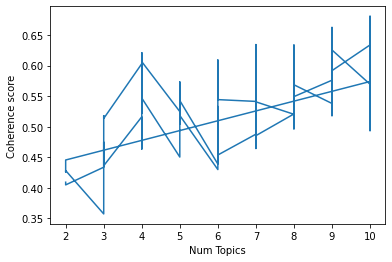

In [196]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(evaluation_df["Topics"], evaluation_df["Coherence"])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

**AS OBSERVED, MAXIMUM COHERENCE VALUE IS OBTAINED WITH THE NUMBER OF TOPICS AS=10**

> HENCE, NOW WE OBSERVE THE REST OF THE PARAMETERS(ALPHA, BETA) WITH N=9 TO OBTAIN THE OPTIMAL MODEL HYPERPARAMETERS.



In [ ]:
evaluation_df[evaluation_df.Topics == 9]

**FROM THIS, WE ASSIGN THE OPTIMAL VALUES FOR THE HYPERPARAMETERS AS:**


> **NUMBER OF TOPICS = 9**

> **VALUE OF ALPHA = 0.05**

> **VALUE OF BETA = 0.61**

> **CORRESPONDING COHERENCE VALUE = 0.73**










# **FINAL LDA MODEL:**

In [199]:
# LDA Model building 
lda_model = gensim.models.LdaMulticore(corpus, num_topics=9, id2word=dictionary, alpha = 0.05, eta = 0.61, passes=20, workers=2, random_state=10)

In [200]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.022*"art" + 0.015*"thiel" + 0.012*"student" + 0.009*"minor" + 0.008*"college" + 0.008*"studio" + 0.006*"program" + 0.004*"work" + 0.004*"gallery" + 0.004*"learn"
Topic: 1 
Words: 0.004*"read" + 0.004*"nadhi" + 0.004*"pooja" + 0.004*"news" + 0.002*"new" + 0.002*"image" + 0.002*"view" + 0.002*"film" + 0.002*"ceremony" + 0.002*"launched"
Topic: 2 
Words: 0.009*"film" + 0.006*"like" + 0.005*"history" + 0.004*"baby" + 0.004*"astonishing" + 0.004*"work" + 0.004*"accomplished" + 0.004*"wringer" + 0.004*"cowboy" + 0.004*"pleaser"
Topic: 3 
Words: 0.016*"album" + 0.013*"yanni" + 0.012*"feat" + 0.009*"mix" + 0.008*"download" + 0.007*"video" + 0.005*"sada" + 0.005*"dugg" + 0.005*"baby" + 0.005*"loaf"
Topic: 4 
Words: 0.024*"art" + 0.015*"painting" + 0.015*"friday" + 0.011*"acrylic" + 0.009*"lesson" + 0.009*"paint" + 0.008*"night" + 0.007*"sarasota" + 0.006*"com" + 0.006*"beginner"
Topic: 5 
Words: 0.011*"virtual" + 0.009*"sky" + 0.006*"space" + 0.006*"planet" + 0.005*"antonio" 

# **MODEL VISUALIZATION**

> **WORD CLOUD**



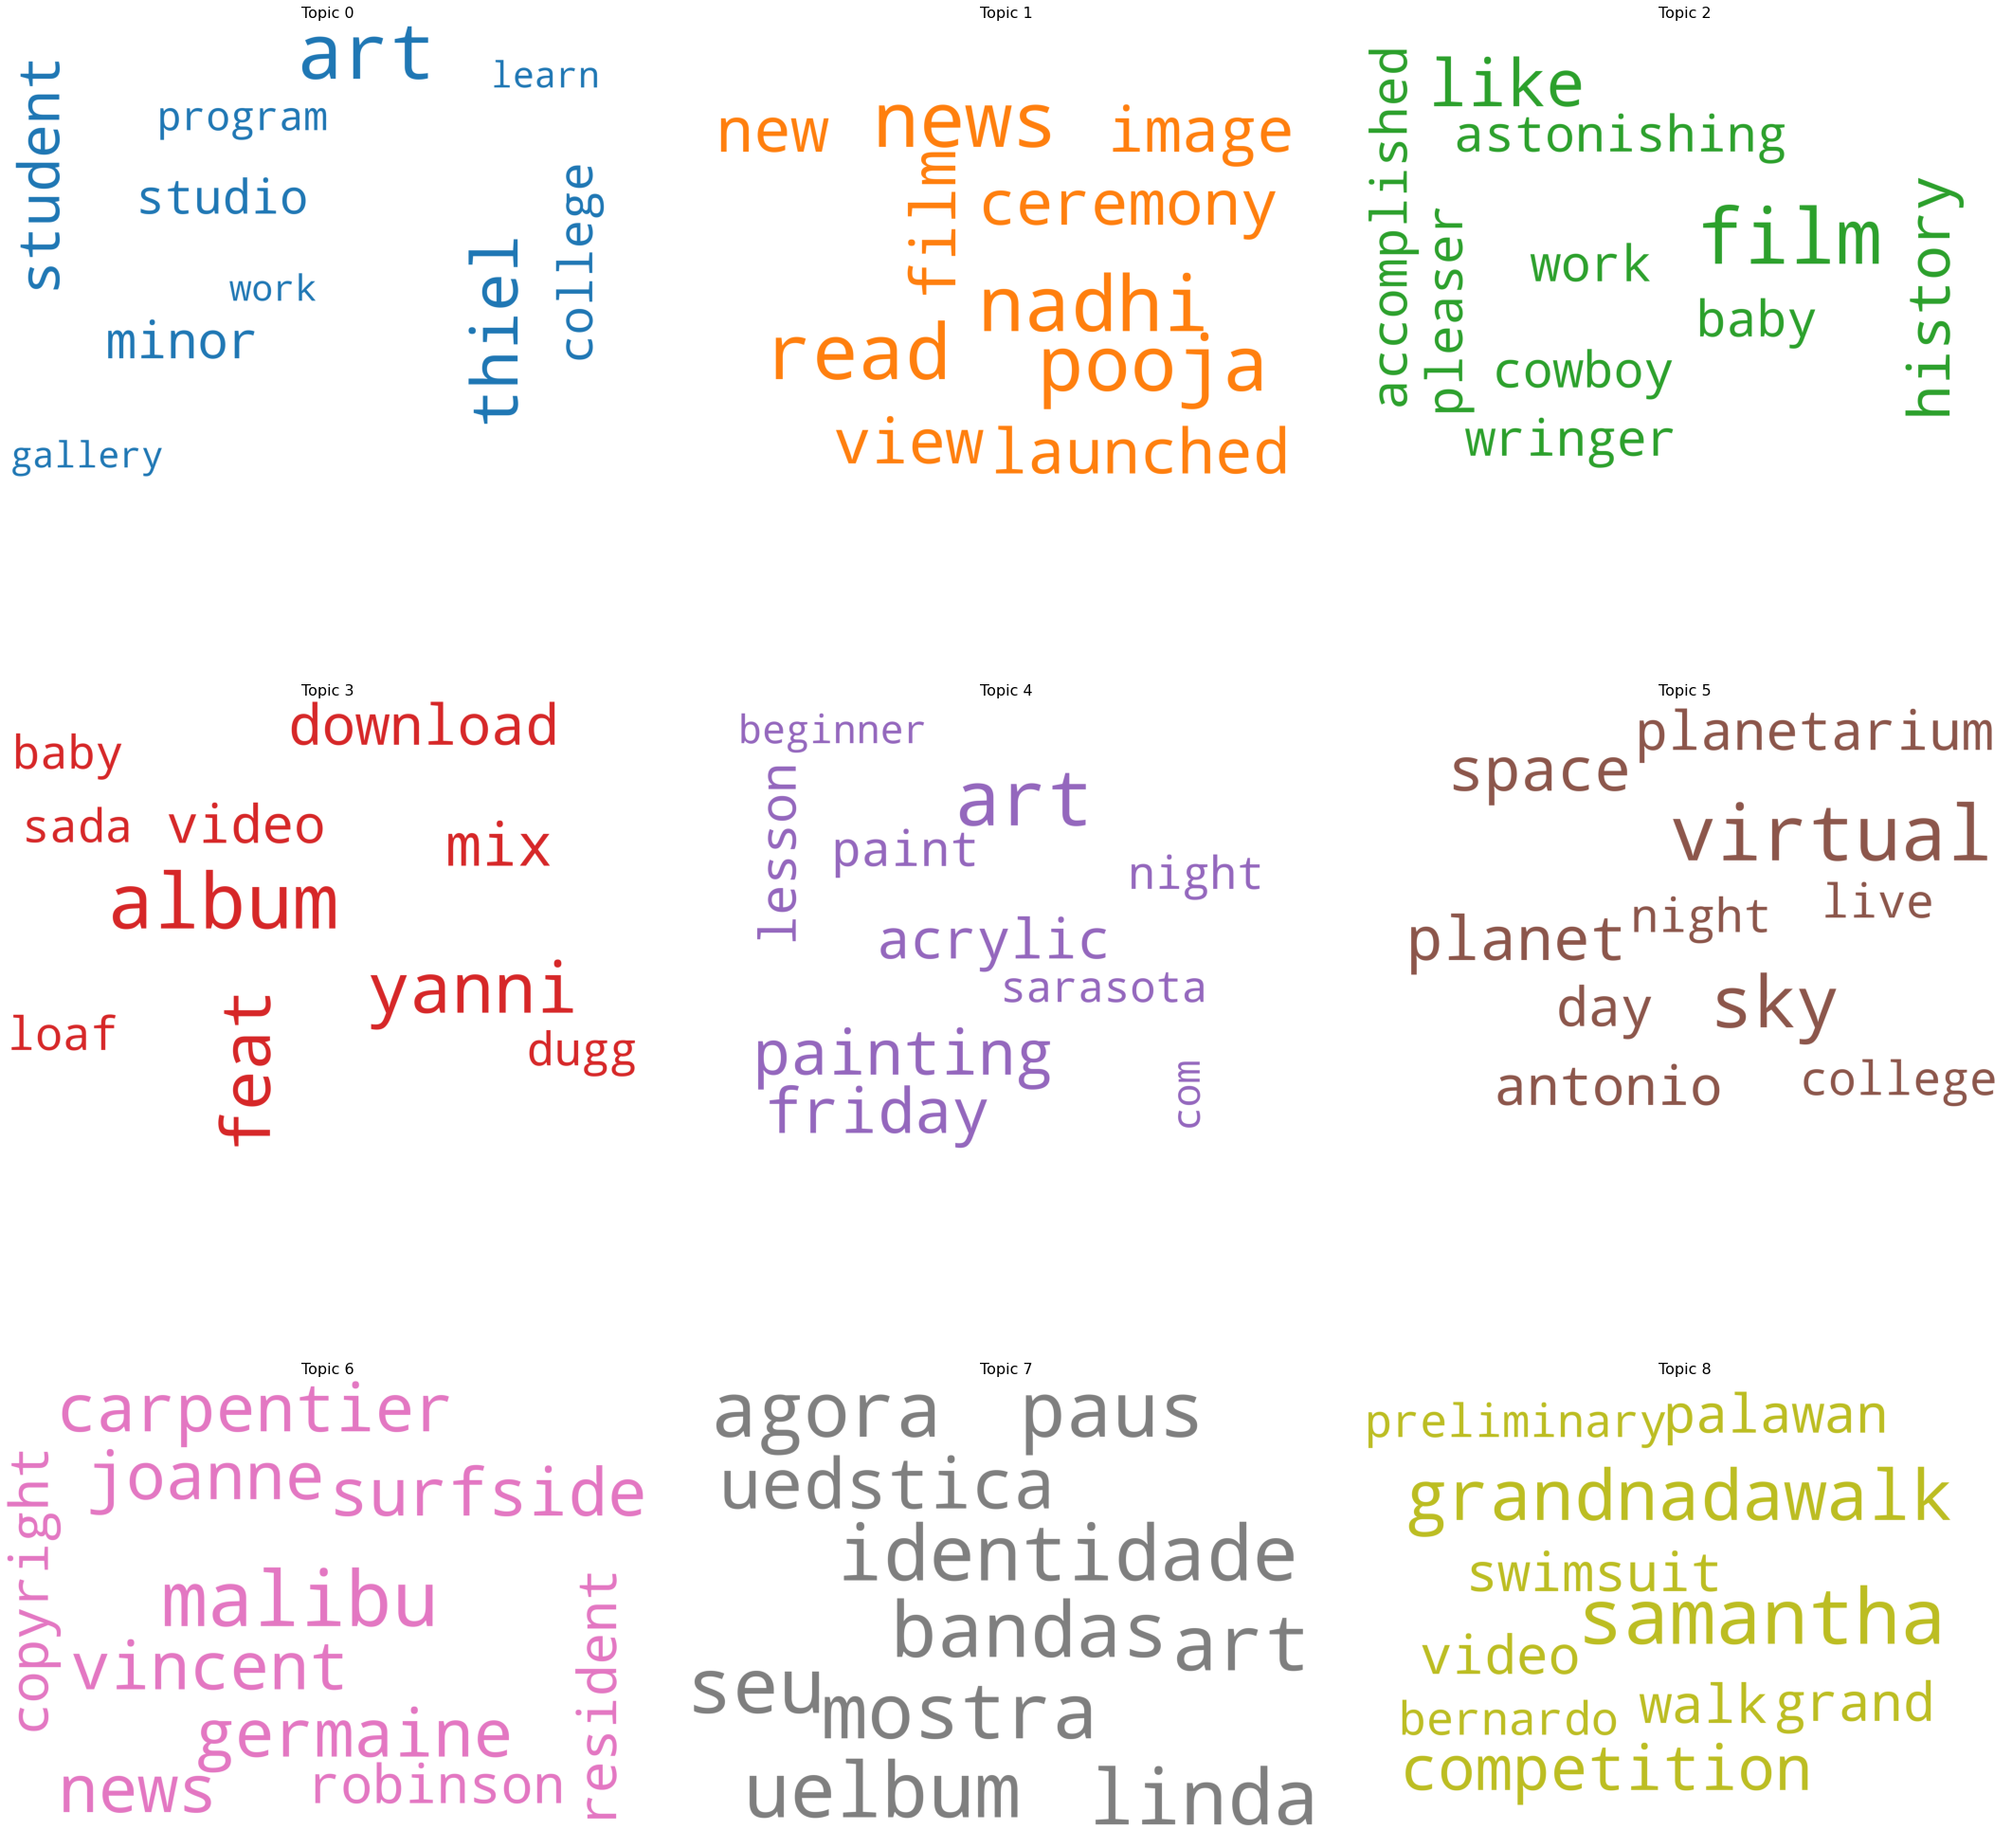

In [214]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

**Intertopic Distance Map**

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

# **INFERRING TOPICS FROM KEYWORDS:**

> **TOPIC1 - COLLEGE ART COMPETITION**
 
> **TOPIC2 - NEWS; RELIGIOUS FESTIVAL**

> **TOPIC3 - MOVIES AND ENTERTAINMENT**

> **TOPIC4 - MUSIC AND LATEST ALBUMS**

> **TOPIC5 - BASIC ART AND PAINTING CLASSES**

> **TOPIC6 - SPACE AND TECHNOLOGY**

> **TOPIC7 - TRAVELLING**

> **TOPIC8 - MUSICAL INSTRUMENTS**

> **TOPIC9 - MISS WORLD, 2013 WINNER: SAMANTHA BERNARDO VICTORY WALK**



















# **MODEL EVALUATION:**

In [201]:
# Compute Perplexity
print("With Bag Of Words:\n")
print('\nPerplexity with BoW: ', lda_model.log_perplexity(corpus), )  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

With Bag Of Words:


Perplexity with BoW:  -6.628609344187725

Coherence Score:  0.7370275715717196


**USING THE HYPERPARAMETERS GREATLY IMPROVED THE COHERENCE SCORE.**

# **FINDING THE DOMINANT TOPIC IN EACH DOCCUMENT**

In [203]:
topic_dist = []
for i in range(17):
  text = data[i]
  print("The topic dominant in the doccument number {}: ".format(i+1),lda_model[dictionary.doc2bow(text)])
  topic_dist.append(lda_model[dictionary.doc2bow(text)])

The topic dominant in the doccument number 1:  [(4, 0.99916047)]
The topic dominant in the doccument number 2:  [(2, 0.995089)]
The topic dominant in the doccument number 3:  [(4, 0.97411007)]
The topic dominant in the doccument number 4:  [(0, 0.99804354)]
The topic dominant in the doccument number 5:  [(3, 0.99237365)]
The topic dominant in the doccument number 6:  [(7, 0.9954777)]
The topic dominant in the doccument number 7:  [(4, 0.97231835)]
The topic dominant in the doccument number 8:  [(1, 0.98294246)]
The topic dominant in the doccument number 9:  [(3, 0.9988715)]
The topic dominant in the doccument number 10:  [(4, 0.9989782)]
The topic dominant in the doccument number 11:  [(3, 0.94630873)]
The topic dominant in the doccument number 12:  [(3, 0.97231835)]
The topic dominant in the doccument number 13:  [(8, 0.99609566)]
The topic dominant in the doccument number 14:  [(6, 0.98487717)]
The topic dominant in the doccument number 15:  [(5, 0.9956733)]
The topic dominant in the

# **FINAL DATAFRAME**

In [215]:
df_data_final = pd.DataFrame(list(zip(file_names,data, topic_dist) ), columns=['Web page file', 'Tokenized Text','Topics Distribution'])

In [218]:
print(df_data_final)

                Web page file  ...                                Topics Distribution
0    ver1_scrapedweb-107.json  ...                                  [(4, 0.99916047)]
1   ver1_scrapedweb-1023.json  ...                                    [(2, 0.995089)]
2   ver1_scrapedweb-1024.json  ...                                  [(4, 0.97411007)]
3   ver1_scrapedweb-1025.json  ...                                  [(0, 0.99804354)]
4   ver1_scrapedweb-1026.json  ...                                  [(3, 0.99237365)]
5   ver1_scrapedweb-1027.json  ...                                   [(7, 0.9954777)]
6   ver1_scrapedweb-1030.json  ...                                  [(4, 0.97231835)]
7   ver1_scrapedweb-1031.json  ...                                  [(1, 0.98294246)]
8   ver1_scrapedweb-1032.json  ...                                   [(3, 0.9988715)]
9   ver1_scrapedweb-1033.json  ...                                   [(4, 0.9989782)]
10  ver1_scrapedweb-1034.json  ...                    

# **INFERRING TOPICS FROM KEYWORDS:**

> **TOPIC1 - COLLEGE ART COMPETITION**
 
> **TOPIC2 - NEWS; RELIGIOUS FESTIVAL**

> **TOPIC3 - MOVIES AND ENTERTAINMENT**

> **TOPIC4 - MUSIC AND LATEST ALBUMS**

> **TOPIC5 - BASIC ART AND PAINTING CLASSES**

> **TOPIC6 - SPACE AND TECHNOLOGY**

> **TOPIC7 - TRAVELLING**

> **TOPIC8 - MUSICAL INSTRUMENTS**

> **TOPIC9 - MISS WORLD, 2013 WINNER: SAMANTHA BERNARDO VICTORY WALK**